Data Cleaning with Python

In [2]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [73]:
# Loading the datasets
data1 = pd.read_csv('/fifa21 raw data v2.csv')
data2 = pd.read_csv('/fifa21_raw_data.csv')

<ipython-input-73-c5a31fcd445e>:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/fifa21 raw data v2.csv')
<ipython-input-73-c5a31fcd445e>:3: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/fifa21_raw_data.csv')


data1.columns

In [74]:
data1.shape

(18979, 77)

In [75]:
data2.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [76]:
data2.shape

(18979, 77)

In [77]:
if data1.shape == data2.shape:
  print('The two datasets have the same shape')
else:
  print('The two datasets have different shapes')

The two datasets have the same shape


In [78]:
if list(data1.columns) == list(data2.columns):
  print('The two datasets have the same column shape')
else:
  print('The two datasets have different column names')

The two datasets have different column names


In [79]:
# Get the sets of column names for each dataset
cols1 = set(data1.columns)
cols2 = set(data2.columns)

# Finding the columns that are in one dataset but not the other
diff_cols = cols1.symmetric_difference(cols2)

for col in diff_cols:
  if col in cols1:
    print(f"  - {col}(in data1)")
  else:
    print(f"  - {col} (in data2)")

  - Best Position(in data1)
  - Contract(in data1)
  - foot (in data2)
  - Growth (in data2)
  - BP (in data2)
  - Team & Contract (in data2)
  - Club(in data1)
  - Preferred Foot(in data1)


In [80]:
data1['Growth'] = data2['Growth']

data1.to_csv('updated_data1.csv', index=False)

In [81]:
data1.shape

(18979, 78)

In [82]:
# Creating a copy of data1
updated_data1 = data1.copy()

In [83]:
# checking for Missing values
total_cell = np.product(data1.shape)
print(total_cell)

1480362


In [84]:
total_mising = data1.isnull().sum().sum()
print(total_mising)

20561


In [85]:
percentage_missing = (100*total_mising)/total_cell
print(percentage_missing)

1.3889170351576168


In [86]:
values_count = data1.isnull().sum()
values_count

ID                      0
Name                    0
LongName                0
photoUrl                0
playerUrl               0
Nationality             0
Age                     0
↓OVA                    0
POT                     0
Club                    0
Contract                0
Positions               0
Height                  0
Weight                  0
Preferred Foot          0
BOV                     0
Best Position           0
Joined                  0
Loan Date End       17966
Value                   0
Wage                    0
Release Clause          0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                 0
Skill                   0
Dribbling               0
Curve                   0
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                 0
Reactions   

In [87]:
#Checking for count of only null values
data1.isnull().sum()[data1.isnull().sum()>=1]

Loan Date End    17966
Hits              2595
dtype: int64

In [88]:
# Drop column 'Load Date End' and modify the original DataFrame
data1.drop('Loan Date End', axis=1, inplace=True)

# Replace Nan values in 'Hits' column with 0
data1['Hits'].fillna(0, inplace=True)

In [89]:
# Check if there are any Nan values
if data1.isnull().values.any():
  print('there are still nan values')
else:
  print('Clear no Nan values')

Clear no Nan values


In [90]:
 # Irrelevant features
 data1.dtypes

ID                   int64
Name                object
LongName            object
photoUrl            object
playerUrl           object
Nationality         object
Age                  int64
↓OVA                 int64
POT                  int64
Club                object
Contract            object
Positions           object
Height              object
Weight              object
Preferred Foot      object
BOV                  int64
Best Position       object
Joined              object
Value               object
Wage                object
Release Clause      object
Attacking            int64
Crossing             int64
Finishing            int64
Heading Accuracy     int64
Short Passing        int64
Volleys              int64
Skill                int64
Dribbling            int64
Curve                int64
FK Accuracy          int64
Long Passing         int64
Ball Control         int64
Movement             int64
Acceleration         int64
Sprint Speed         int64
Agility              int64
R

In [91]:
obj_cols = data1.select_dtypes(include = ['object'])
obj_cols

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,"Jul 1, 2004",€103.5M,€560K,€138.4M,4 ★,4★,Medium,Low,5 ★,771
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,"Jul 10, 2018",€63M,€220K,€75.9M,4 ★,5★,High,Low,5 ★,562
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,"Jul 16, 2014",€120M,€125K,€159.4M,3 ★,1★,Medium,Medium,3 ★,150
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,"Aug 30, 2015",€129M,€370K,€161M,5 ★,4★,High,High,4 ★,207
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,"Aug 3, 2017",€132M,€270K,€166.5M,5 ★,5★,High,Medium,5 ★,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,CB,"Jul 13, 2018",€100K,€1K,€70K,2 ★,2★,Medium,Medium,1 ★,0
18975,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,CAM,"Aug 1, 2020",€130K,€500,€165K,2 ★,2★,Medium,Medium,1 ★,0
18976,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,\n\n\n\nDerry City,2019 ~ 2020,CM,179cm,74kg,Right,CAM,"Mar 8, 2019",€120K,€500,€131K,2 ★,2★,Medium,Medium,1 ★,0
18977,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,\n\n\n\nDalian YiFang FC,2020 ~ 2022,RW,175cm,69kg,Right,ST,"Sep 22, 2020",€100K,€2K,€88K,3 ★,2★,Medium,Medium,1 ★,0


In [93]:
# Convert column Hits to integer datatype and changing the prefix K
data1[['Hits', 'Name']]

,Hits,Name
0,771,L. Messi
1,562,Cristiano Ronaldo
2,150,J. Oblak
3,207,K. De Bruyne
4,595,Neymar Jr
...,...,...
18974,0,Xia Ao
18975,0,B. Hough
18976,0,R. McKinley
18977,0,Wang Zhen'ao


In [94]:
data1['Hits'] = data1['Hits'].apply(lambda x: int(float(x[:-1]) *1000) if isinstance(x, str) and 'K' in x else int(x))

data1['Hits'] = data1['Hits'].astype(int)

In [95]:
# data1['Height'] = data1['Height'].str.replace('cm', '').astype(int)
# data1['Weight'] = data1['Weight'].str.replace('kg', '').astype(int)
data1[['Height', 'Weight']] = data1[['Height', 'Weight']].apply(lambda x: pd.to_numeric(x.str.extract('(\d+)')[0], errors='coerce'))

In [98]:
data1[['Height', 'Weight']]

,Height,Weight
0,170,72
1,187,83
2,188,87
3,181,70
4,175,68
...,...,...
18974,178,66
18975,175,65
18976,179,74
18977,175,69


In [99]:
# Converting Joined column to Date datatype
data1['Joined'] = pd.to_datetime(data1['Joined'], format = '%b %d, %Y')


data1['Joined'].dtypes

dtype('<M8[ns]')

In [106]:
import re

# define a function to convert value to integer
def convert_value(val):
    if isinstance(val, int):
        return val
    elif val[-1] == 'M':
        return int(float(re.sub('[^0-9.]', '', val)) * 1000000)
    elif val[-1] == 'K':
        return int(float(re.sub('[^0-9.]', '', val)) * 1000)
    else:
        return int(re.sub('[^0-9.]', '', val))

# convert "Value", "Wage", and "Release Clause" columns to integer
data1['Value'] = data1['Value'].apply(convert_value)
data1['Wage'] = data1['Wage'].apply(convert_value)
data1['Release Clause'] = data1['Release Clause'].apply(convert_value)


In [107]:
data1[['Value', 'Wage', 'Release Clause']].dtypes

Value             int64
Wage              int64
Release Clause    int64
dtype: object

In [108]:
data1[['Value', 'Wage', 'Release Clause']]

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000
...,...,...,...
18974,100000,1000,70000
18975,130000,500,165000
18976,120000,500,131000
18977,100000,2000,88000


In [109]:
# W/F, SM, IR columns has star character
for col in ['W/F', 'SM', 'IR']:
  data1[col] = pd.to_numeric(data1[col].str.replace('★', ''))

In [110]:
data1[['W/F', 'SM', 'IR']]

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,3,2,1


In [111]:
data1 = data1.rename(columns={'LongName': 'Full Name', 'photoUrl':'Photo_Url', 'playerUrl': 'Player_Url'})

In [112]:
data1['Club'] = data1['Club'].str.replace('\n\n\n\n', '')
data1['Contract'] = data1['Contract'].str.replace('~', '-')

In [113]:
# Droping Photo_Url and Player_Url because they are not accessable and are irrelevant
data1 = data1.drop(['Photo_Url', 'Player_Url'], axis=1)

In [114]:
data1

,ID,Name,Full Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Growth
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187,83,Right,92,ST,2018-07-10,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,0
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188,87,Right,91,GK,2014-07-16,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181,70,Right,91,CAM,2015-08-30,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175,68,Right,91,LW,2017-08-03,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178,66,Right,49,CB,2018-07-13,100000,1000,70000,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2,2,Medium,Medium,1,64,28,26,38,48,51,0,5
18975,258760,B. Hough,Ben Hough,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175,65,Right,51,CAM,2020-08-01,130000,500,165000,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2,2,Medium,Medium,1,64,40,48,49,35,45,0,20
18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,Derry City,2019 - 2020,CM,179,74,Right,49,CAM,2019-03-08,120000,500,131000,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2,2,Medium,Medium,1,63,39,44,46,40,53,0,8
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175,69,Right,48,ST,2020-09-22,100000,2000,88000,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3,2,Medium,Medium,1,58,49,41,49,30,44,0,20


In [117]:
# Check for Duplicates
dup = data1.duplicated()

num_dup = dup.sum()
num_dup

0

In [118]:
# Sorting the Positions column
data1['Positions']

0        RW, ST, CF
1            ST, LW
2                GK
3           CAM, CM
4           LW, CAM
            ...    
18974            CB
18975            CM
18976            CM
18977            RW
18978        CB, LB
Name: Positions, Length: 18979, dtype: object

In [119]:
data1['Positions'] = data1['Positions'].apply(lambda x: ' '.join(sorted(x.split())))
data1['Positions']

0        CF RW, ST,
1            LW ST,
2                GK
3           CAM, CM
4           CAM LW,
            ...    
18974            CB
18975            CM
18976            CM
18977            RW
18978        CB, LB
Name: Positions, Length: 18979, dtype: object

That's all for inconsistent data, let's move to Outliers.

In [120]:
data1.describe()

,ID,Age,↓OVA,POT,Height,Weight,BOV,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Growth
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,1.897900e+04,18979.000000,1.897900e+04,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,180.828811,75.215449,66.751726,2.865063e+06,9092.062279,3.962951e+06,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,2.940513,2.364982,1.091628,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,22.936720,5.417461
std,27141.054157,4.710520,6.968999,6.114635,10.562519,8.342299,6.747193,7.685154e+06,19707.021089,9.772762e+06,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,0.668449,0.766114,0.361760,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883,119.861937,5.663954
min,41.000000,16.000000,47.000000,47.000000,5.000000,50.000000,48.000000,0.000000e+00,0.000000,0.000000e+00,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,1.000000,1.000000,1.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,0.000000,0.000000
25%,210135.000000,21.000000,61.000000,67.000000,176.000000,70.000000,62.000000,4.750000e+05,1000.000000,4.235000e+05,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,3.000000,2.000000,1.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000,1.000000,0.000000
50%,232418.00

<Axes: xlabel='Wage'>

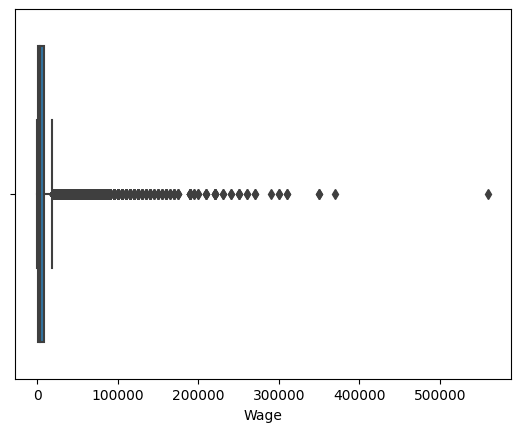

In [124]:
sns.boxplot(x = data1['Wage'])

Conclusion:

Data cleaning may seem like a tedious and time-consuming process, but it is essential for ensuring the accuracy and reliability of your data. By following best practices such as identifying outliers, handling missing values, and standardizing data formats, you can transform messy, incomplete data into valuable insights that inform important decisions.